In [47]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from re import sub
from decimal import Decimal

In [48]:
# Loading the CSV file into a pandas dataframe.
df = pd.read_csv('CARS.csv')
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [49]:
# Removing irrelevant features
df = df.drop(['Model', 'DriveTrain', 'Invoice' , 'Origin', 'Type'], axis=1)
df['MSRP'] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
df.head(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,36945.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,23820.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,26990.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,33195.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,43755.0,3.5,6.0,225,18,24,3880,115,197


In [64]:
df.isnull().sum()

Make           0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [66]:
df = df.fillna(0) 

In [67]:
# Importing all the required libraries
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
# Creating the Lasso Regression Model
reg = linear_model.Lasso(alpha=0.1)

In [69]:
X = df.drop('MSRP', axis=1)
y = df['MSRP']

labelencoder_X = LabelEncoder()
X['Make'] = labelencoder_X.fit_transform(X['Make'])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [71]:
reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
pred = reg.predict(X_test)

In [92]:
sample = X_test.to_numpy()[0].reshape(1,-1)
reg.predict(sample)[0]

42703.11854608914

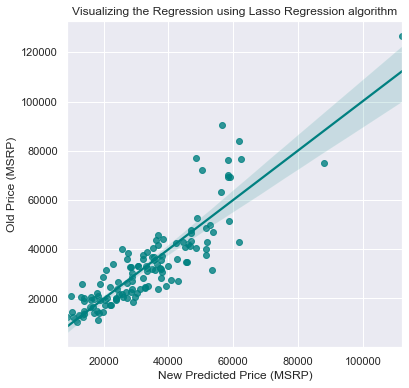

In [76]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression using Lasso Regression algorithm')
sns.regplot(pred, y_test, color = 'teal')
plt.xlabel('New Predicted Price (MSRP)')
plt.ylabel('Old Price (MSRP)')
plt.show()

In [78]:
print('Mean Absolute Error is :', mean_absolute_error(y_test, pred))
print(' — — — — — — — — — — — — — — — — — — — — — — — ')
print('Mean Squared Error is :', mean_squared_error(y_test, pred))
print(' — — — — — — — — — — — — — — — — — — — — — — — ')
print('Coeffients are : ', reg.coef_)
print(' — — — — — — — — — — — — — — — — — — — — — — — ')
print('Intercepts are :' ,reg.intercept_)
print(' — — — — — — — — — — — — — — — — — — — — — — — ')
print('The R2 square value of Lasso is :', r2_score(y_test, pred)*100)

Mean Absolute Error is : 6517.476891048097
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 75675165.85407703
 — — — — — — — — — — — — — — — — — — — — — — — 
Coeffients are :  [   11.01508731 -4909.18266755  2665.05996899   250.77842397
  -305.62227966   872.89855084     5.9312958   -612.9527752
    39.46320263]
 — — — — — — — — — — — — — — — — — — — — — — — 
Intercepts are : -821.7333217957203
 — — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of Lasso is : 77.4344493520668


In [95]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(reg, file)

In [96]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    model = pickle.load(file)

In [98]:
sample = X_test.to_numpy()[0].reshape(1,-1)
print('sample:',sample)
model.predict(sample)[0]

sample: [[5.000e+00 5.300e+00 8.000e+00 2.950e+02 1.400e+01 1.800e+01 5.678e+03
  1.300e+02 2.220e+02]]


42703.11854608914